In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dependency

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL
from PIL import ImageFilter
import cv2
import itertools
import random
import keras
import imutils
from imutils import paths
import os
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras import backend as K
import tqdm

%matplotlib inline

# Augumentation Steps 
1) Noise
2) Blur
3) Perpective Rotation
4) Shading
5) Variable Character Spacing
6) Variable Aspect Ratio

In [ ]:
!pwd

/content


In [ ]:
!gdown --id 1L843daxmFSZD_hyz_AMIQ6-dzTPDaoGJ

Downloading...
From: https://drive.google.com/uc?id=1L843daxmFSZD_hyz_AMIQ6-dzTPDaoGJ
To: /content/font_fam-20220209T082332Z-001.zip
100% 86.7M/86.7M [00:00<00:00, 176MB/s]


In [ ]:
!unzip /content/font_fam-20220209T082332Z-001.zip

Archive:  /content/font_fam-20220209T082332Z-001.zip
replace font_fam/Kunlasatri/1fa411d_Kunlasatri_24px_normal_bold.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!cp -r /content/drive/MyDrive/Machima/MiniHackathon-Week1-FontRecogition/font_recognition/train/font_fam font_fam2

^C


In [ ]:
def pil_image(img_path):
    pil_im =PIL.Image.open(img_path)
    pil_im=pil_im.resize((105,105))
    #imshow(np.asarray(pil_im))
    return pil_im

In [ ]:
def noise_image(pil_im):
    # Adding Noise to image
    img_array = np.asarray(pil_im)
    mean = 0.0   # some constant
    std = 5   # some constant (standard deviation)
    noisy_img = img_array + np.random.normal(mean, std, img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped)) # output
    #imshow((noisy_img_clipped ).astype(np.uint8))
    noise_img=noise_img.resize((105,105))
    return noise_img

In [ ]:
def blur_image(pil_im):
    #Adding Blur to image 
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput
    #imshow(blur_img)
    blur_img=blur_img.resize((105,105))
    return blur_img

In [ ]:
def affine_rotation(img):
    
    #img=cv2.imread(img_path,0)
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    A = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, A, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output)) # affine rotated output
    #imshow(output)
    affine_img=affine_img.resize((105,105))
    return affine_img

In [ ]:
def pil_image(img_path):
    pil_im =PIL.Image.open(img_path)
    pil_im = cv2.cvtColor(img_path, cv2.COLOR_GRAY2RGB)
    pil_im=pil_im.resize((105,105))
    #imshow(np.asarray(pil_im))
    return pil_im

# Preparing Dataset

In [ ]:
path = "/content/"
data_path = "/content/font_fam"      # save model
data=[]
labels=[]
imagePaths = sorted(list(paths.list_images(data_path)))
random.seed(42)
random.shuffle(imagePaths)

In [ ]:
data

[]

## Convert Label

In [ ]:
def conv_label(label):
    if label == 'Angsana_New':
        return 0
    elif label == 'CORDIA':
        return 1
    elif label == 'DM_Shining Star_Regular':
        return 2
    elif label == 'FC_Knomphing_Regular':
        return 3
    elif label == 'Kunlasatri':
        return 4
    elif label == 'TH_Chakra_Petch':
        return 5
    elif label == 'TH_Charm_of_AU':
        return 6
    elif label == 'TH_Mali_Grade6':
        return 7
    elif label == 'THSarabun':
        return 8  
    elif label == 'fonttintin':
        return 9    

In [ ]:
augument=["blur","noise","affine","gradient"]
a=itertools.combinations(augument, 4)

for i in list(a): 
    print(list(i))

['blur', 'noise', 'affine', 'gradient']


In [ ]:
counter=0
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    label = conv_label(label)
    pil_img = pil_image(imagePath)
    #imshow(pil_img)
    
    # Adding original image
    org_img = img_to_array(pil_img)
    #print(org_img.shape)
    data.append(org_img)
    labels.append(label)
    
    # augument=["noise","blur","affine","gradient"]
    # for l in range(0,len(augument)):
    
    #     a=itertools.combinations(augument, l+1)

    #     for i in list(a): 
    #         combinations=list(i)
    #         print(len(combinations))
    #         temp_img = pil_img
    #         for j in combinations:
            
    #             if j == 'noise':
    #                 # Adding Noise image
    #                 temp_img = noise_image(temp_img)
                    
    #             elif j == 'blur':
    #                 # Adding Blur image
    #                 temp_img = blur_image(temp_img)
    #                 #imshow(blur_img)
                    
    
    #             elif j == 'affine':
    #                 open_cv_affine = np.array(pil_img)
    #                 # Adding affine rotation image
    #                 temp_img = affine_rotation(open_cv_affine)

    #             elif j == 'gradient':
    #                 open_cv_gradient = np.array(pil_img)
    #                 # Adding gradient image
    #                 temp_img = gradient_fill(open_cv_gradient)
  
    #         temp_img = img_to_array(temp_img)
    #         data.append(temp_img)
    #         labels.append(label)

TypeError: ignored

In [ ]:
len(labels)               # 42400

56004

In [ ]:
data   = np.asarray(data, dtype="float") / 255.0
labels = np.array(labels)
#print("Success")
data.shape                # (624, 105, 105, 1) (42400, 105, 105, 1)
#labels.shape              # (624,)

(56004, 105, 105, 1)

In [ ]:
labels.shape              # (42400,)

(56000,)

In [ ]:
labels[0]

4

## Spit Data

In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [ ]:
trainY.shape,testY.shape

((42000,), (14000,))

In [ ]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=10)
testY  = to_categorical(testY, num_classes=10)

In [ ]:
trainX.shape            # (468, 105, 105, 1) (20736, 105, 105, 1)

(42000, 105, 105, 1)

In [ ]:
testX.shape             # (156, 105, 105, 1)  (6912, 105, 105, 1)

(14000, 105, 105, 1)

In [ ]:
trainY.shape            # (468, 5) (20736, 10)

(42000, 10)

In [ ]:
testY.shape             # (156, 5) (6912, 10)

(14000, 10)

In [ ]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [ ]:
K.set_image_data_format('channels_last')

# **Prepare Nasnet**

In [ ]:
import tensorflow as tf

new_input = tf.keras.layers.Input(shape=(105,105,3))
model = tf.keras.applications.NASNetLarge(include_top=False, input_tensor=new_input, weights="imagenet", pooling='max')

outputs = tf.keras.layers.Dense(10, activation='softmax')(model.output)
model = tf.keras.Model(new_input, outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 52, 52, 96)   2592        ['input_5[0][0]']                
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 52, 52, 96)   384         ['stem_conv1[0][0]']             
                                                                                                  
 activation_780 (Activation)    (None, 52, 52, 96)   0           ['stem_bn1[0][0]']         

In [ ]:
path_dir = "/content/"  
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(path_dir+"model/Nasnet_save_best.h5",monitor='val_loss', verbose=0, save_best_only=True,mode='min'),
]
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, decay=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    x=trainX, y=trainY, epochs=20, batch_size=64, callbacks=callbacks, validation_data=(testX,testY),
)
model.fit(
    x=trainX, y=trainY, epochs=20, batch_size=64, callbacks=callbacks, validation_data=(testX, testY),
)


Epoch 1/20


ValueError: ignored

# Prepare Model

In [ ]:
def create_model():
    model=Sequential()

    # Cu Layers 
    model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(105,105,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(24, 24), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))

    model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))

    #Cs Layers
    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))
    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))
    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(2383,activation='relu') )

    model.add(Dense(10, activation='softmax'))
    return model  

In [ ]:
# import tensorflow as tf
# size = (105, 105)

# def create_model():
#   new_input = tf.keras.layers.Input(shape=(size[0], size[1], 3))
#   model     = tf.keras.applications.NASNetLarge(include_top=False, input_tensor=new_input, weights="imagenet", pooling='max')

#   outputs   = tf.keras.layers.Dense(2, activation='softmax')(model.output)
#   model     = tf.keras.Model(new_input, outputs)
#   return model

In [ ]:
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras import layers, Model 
import tensorflow as tf

In [ ]:
# nasnet = NASNetLarge(include_top=False, weights='imagenet')  #include_top คือ output ที่ 1000 class ดังนั้น False คือไม่ใช้
# # fit input
# x_in = layers.Input(shape=(105, 105, 1))
# x = layers.Conv2D(3, 1)(x_in)
# x = nasnet(x)
# # fit output
# x = layers.Flatten()(x)
# x = layers.Dense(10, activation='softmax')(x)
# model = Model(x_in, x)

## Train Model

In [ ]:
batch_size = 128
epochs     = 50
model      = create_model()
#sgd        = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd        =  tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

### ลองเปลียน loss เป็น catagorical 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='max')

filepath   = "/content/drive/MyDrive/font_model_v2.h5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

callbacks_list = [early_stopping,checkpoint]

In [ ]:
model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),callbacks=callbacks_list)


# Epoch 00050: val_loss did not improve from 0.00116
# 249/249 [==============================] - 68s 272ms/step - loss: 5.5410e-04 - accuracy: 0.9966 - val_loss: 0.0022 - val_accuracy: 0.9861


Epoch 1/50
329/329 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.1267
Epoch 00001: val_loss improved from -inf to 0.08957, saving model to /content/drive/MyDrive/font_model_v2.h5
329/329 [==============================] - 121s 323ms/step - loss: 0.0896 - accuracy: 0.1267 - val_loss: 0.0896 - val_accuracy: 0.1334
Epoch 2/50
329/329 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.1481
Epoch 00002: val_loss did not improve from 0.08957
329/329 [==============================] - 89s 272ms/step - loss: 0.0890 - accuracy: 0.1481 - val_loss: 0.0885 - val_accuracy: 0.1634
Epoch 3/50
329/329 [==============================] - ETA: 0s - loss: 0.0876 - accuracy: 0.1763
Epoch 00003: val_loss improved from 0.08957 to 0.09254, saving model to /content/drive/MyDrive/font_model_v2.h5
329/329 [==============================] - 101s 307ms/step - loss: 0.0876 - accuracy: 0.1763 - val_loss: 0.0925 - val_accuracy: 0.1224
Epoch 4/50
329/329 [================

## Evaluate

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Load Model & Test

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Machima/font_recognition/train/syntrainbigfm/font_model_v1.h5')

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
img_path = 'syn619.png'
pil_im = PIL.Image.open(img_path).convert('L')
#pil_im = blur_image(pil_im)
org_img = img_to_array(pil_im)

In [ ]:
data=[]
data.append(org_img)
data = np.asarray(data, dtype="float") / 255.0

In [ ]:
data[0]

In [ ]:
y = model.predict(data)

In [ ]:
y[0]

array([1.0003567e-11, 1.9677382e-09, 1.3252436e-07, 2.4218149e-08,
       4.0524245e-10, 4.8445466e-12, 2.0760140e-11, 7.1015446e-14,
       9.9999988e-01, 1.0444949e-11], dtype=float32)

In [ ]:
# Comparing the actual values versus the predicted values
data_dict = {
    0: 'Angsana_New',
    1: 'Cordia_New',
    2: 'DM_Shining_Star_Regular',
    3: 'FC_Knomphing_Regular',
    4: 'Kunlasatri',
    5: 'TH_Chakra_Petch',
    6: 'TH_Charm_of_AU',
    7: 'TH_Mali_Grade6',
    8: 'TH_Sarabun',
    9: 'fonttintin'}
    
#data_dict[int(label)] 

In [ ]:
test_preds = np.argmax(y[0], axis=-1)
test_preds

8

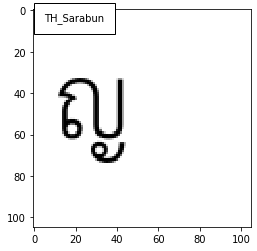

In [ ]:
#label   = rev_conv_label(int(y[0,0]))
label = np.argmax(y[0], axis=-1)
label_str = data_dict[int(label)] 

fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, label_str , bbox={'facecolor': 'white', 'pad': 10})
plt.show()

In [ ]:
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from operator import add
from operator import sub

In [ ]:
!unzip /content/drive/MyDrive/Machima/font_recognition/crop_test.zip

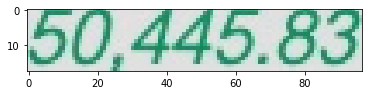

In [ ]:
#image = cv2.imread('/content/crop_test/00013eaf.jpg')
#image = cv2.imread('/content/crop_test/0004eae6.jpg')
image = cv2.imread('/content/crop_test/0011426e.jpg')
plt.imshow(image, cmap='gray')    # color mapping
#plt.savefig('mnist.png')
plt.show()

Resize


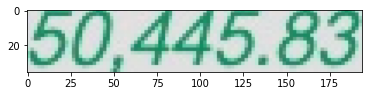

In [ ]:
dimensions = image.shape
if(dimensions[0]<80):
  print("Resize")
  # scale_percent = 60 # percent of original size
  width = int(image.shape[1] *2)
  height = int(image.shape[0] *2)
  dim = (width, height)
    
  # resize image
  image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) 
  plt.imshow(image, cmap='gray')         # color mapping
  #plt.savefig('mnist.png')
  plt.show()

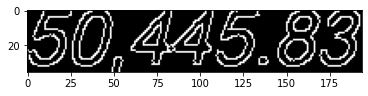

In [ ]:
gray    = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts  = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#print(cnts)
if(len(cnts) !=0):
	cnts = sort_contours(cnts, method="left-to-right")[0]
	#print(cnts)
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing

plt.imshow(edged, cmap='gray')         # color mapping
#plt.savefig('mnist.png')
plt.show()

## Loop Contour

In [ ]:
chars = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=32)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=32)
   # re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (32, 32))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x-2, y-2, w+2, h+2)))

In [ ]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
boxes

[(-2, -2, 21, 31),
 (-1, -2, 27, 35),
 (24, -2, 26, 35),
 (28, 2, 18, 27),
 (58, -2, 50, 34),
 (107, -2, 28, 35),
 (143, -2, 27, 35),
 (167, -2, 26, 35)]

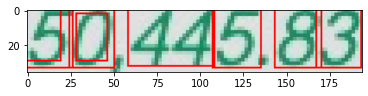

In [ ]:
# loop
for index, (x, y, w, h) in enumerate(boxes):
  #if(index == 1):
  image1 = cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)
  #print(boxes[index])

plt.imshow(image1, cmap='gray')       # color mapping
#plt.savefig('mnist.png')
plt.show() 

In [ ]:
boxes

[(-2, -2, 21, 31),
 (-1, -2, 27, 35),
 (24, -2, 26, 35),
 (28, 2, 18, 27),
 (58, -2, 50, 34),
 (107, -2, 28, 35),
 (143, -2, 27, 35),
 (167, -2, 26, 35)]

In [ ]:
# drop contour
#for i in range(5):
for index, (x, y, w, h) in enumerate(boxes):
  try:
    if((w * h) <1000):
      boxes.pop(index)
  
    if(index==1):
      test_list  =  boxes[0][:1]                         # X
      test_list0 = list(map(sub,boxes[0][2:3] , (3,)))   # W-3

      test_list1 = list(map(abs, boxes[1][:1]))
      res_list   = list(map(add, test_list, test_list0))
      if(test_list1 < res_list):
        #print('True')
        boxes.pop(1)
        print(test_list4 , res_list)        

    if(index==2):
      #print('index2')
      test_list0 = boxes[1][:1]                         # X
      test_list1 = list(map(sub,boxes[1][2:3] , (3,)))  # W-3
      test_list2 = list(map(abs, boxes[2][:1]))

      res_list = list(map(add, test_list1, test_list0))
      if(test_list2 < res_list):
        boxes.pop(2)

    if(index==3):
      #print('index3')
      test_list1 = boxes[2][:1]                         # X
      test_list2 = list(map(sub,boxes[2][2:3] , (3,)))  # W-3
      test_list3 = list(map(abs, boxes[3][:1]))

      res_list = list(map(add, test_list1, test_list2))
      #print(test_list3 , res_list)
      if(test_list3 < res_list ):
        boxes.pop(3)  

    if(index==4):
      #print('index3')
      test_list2 = boxes[3][:1]                             # X
      test_list3 = list(map(sub,boxes[3][2:3] , (3,)))      # W -3
      test_list4 = list(map(abs, boxes[4][:1]))
  
      res_list = list(map(add, test_list3, test_list2))
      #print(test_list4 , res_list)

      if(test_list4 < res_list ):
        boxes.pop(4) 
        #print('pop4')  

    if(index==5):
      #print('index3')
      test_list3 = boxes[4][:1]                             # X
      test_list4 = list(map(sub,boxes[4][2:3] , (3,)))      # W -3
      test_list5 = list(map(abs, boxes[5][:1]))

      res_list = list(map(add, test_list3, test_list4))
      #print(test_list5 , res_list)

      if(test_list5 < res_list ):
        boxes.pop(5) 
    #print('pop4') 
  except:
    print("An exception occurred") 

In [ ]:
plt.imshow(blurred, cmap='gray')         # color mapping
#plt.savefig('mnist.png')
plt.show()